In [382]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_bvp, solve_ivp
from scipy.optimize import root

%run simulation
%run control
%run plotting

#from simulation import *
#from control import *
#from plotting import *

plt.style.use("dark_background")

In [383]:
# Set up initial conditions and parameters
t0 = 0
tf = 5
x0 = np.array([0, 0])
v0 = np.array([2, 1])
masses = np.array([1,1,0])

init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 *x0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 *v0, 0]) # Velocity 3 

# Solve the system
f = lambda t, y: gravity_acceleration_general(y, m=masses)
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 1000), dense_output=True)

t_guess = 1.05, Position: [0.40904719 1.40505742]


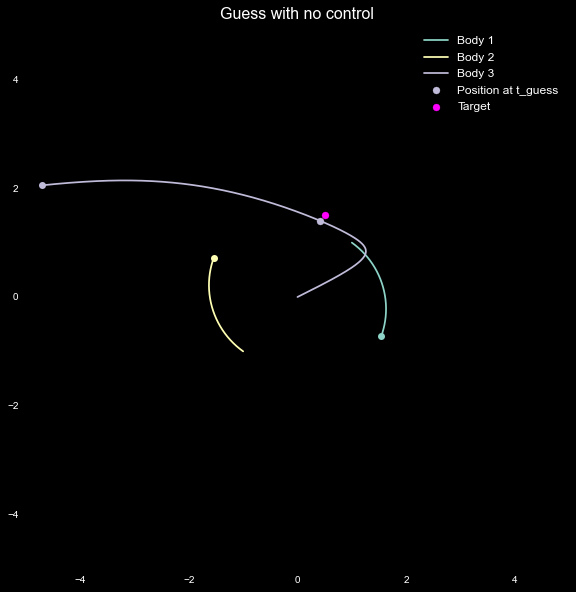

In [410]:
t_guess = 1.05
m0 = np.array([2])
target = np.array([0.5,1.5]) #np.array([0, 1.7])

#Plot the initial system
pos_guess = sol.sol(t_guess)[6:8]
print(f"t_guess = {t_guess}, Position: {pos_guess}")

ax = plt.gca()
plt.scatter(*pos_guess, color="C2", marker='o', label="Position at t_guess", zorder=5)
plt.scatter(*target, color="magenta", marker='o', label="Target", zorder=6)
plot_nbody(sol.y, "Guess with no control", ax=ax)

plt.show()

In [385]:
sol2, u = solve_optimal_euclidean(sol, masses[:-1], x0, v0, m0, target, delta=100, tf_guess=t_guess, p12_guess_strat="bolza",
                                  verbose=2, max_nodes=20_000)

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          6.89e+01       9.53e+00          100            198      
       2          1.11e+02       6.86e+00          298            594      
       3          3.81e+02       3.22e+00          892           1782      
       4          6.26e+02       2.32e-02         2674           4828      
       5          8.93e+02       4.21e-02         7502          (14052)    
Number of nodes is exceeded after iteration 5. 
Maximum relative residual: 8.93e+02 
Maximum boundary residual: 4.21e-02


t_f = 1.0499845976469941
m_f = 1.341034038459784
x(t_f) =  [0.50157442 1.49710382]


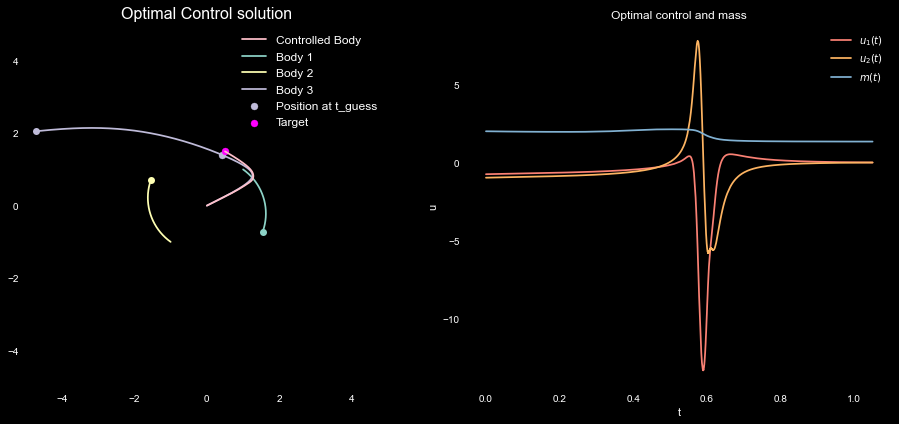

In [407]:
print("t_f =", sol2.p[0])
print("m_f =", sol2.y[4,-1])
print("x(t_f) = ", sol2.y[:2, -1])

fig, axs = plt.subplots(1,2, figsize=(13, 6))
ax1, ax2 = axs

ax1.plot(sol2.y[0], sol2.y[1], color = 'pink', zorder=10, label="Controlled Body")
ax1.scatter(*pos_guess, color="C2", marker='o', label="Position at t_guess", zorder=5)
ax1.scatter(*target, color="magenta", marker='o', label="Target", zorder=6)
plot_nbody(sol.y, "Optimal Control solution", ax=ax1)

#Plot optimal control over time
u1, u2 = u
t  = sol2.p[0]*sol2.x
ax2.plot(t, u1, c='C3', label="$u_1(t)$")
ax2.plot(t, u2, c='C5', label="$u_2(t)$")
ax2.plot(t, sol2.y[4], c='C4', label="$m(t)$")
ax2.set_xlabel("t")
ax2.set_ylabel("u")
ax2.legend()
ax2.grid() #remove grid
ax2.set_title("Optimal control and mass")

plt.tight_layout()
plt.show()